In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import cv2
import tensorflow as tf
warnings.filterwarnings('ignore')
from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [2]:
model = tf.keras.models.load_model('object_detection_2.keras')
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 111, 111, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 111, 111, 32)      │              96 │ conv2d[0][0]               │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation (Activation)       │ (None, 111, 111, 32)      │               0 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 109, 109, 32)      │           9,216 │ activation[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_1         │ (None, 109, 109, 32)      │              96 │ conv2d_1[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_1 (Activation)     │ (None, 109, 109, 32)      │               0 │ batch_normalization_1[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 109, 109, 64)      │          18,432 │ activation_1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_2         │ (None, 109, 109, 64)      │             192 │ conv2d_2[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_2 (Activation)     │ (None, 109, 109, 64)      │               0 │ batch_normalization_2[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 54, 54, 64)        │               0 │ activation_2[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 54, 54, 80)        │           5,120 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_3         │ (None, 54, 54, 80)        │             240 │ conv2d_3[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_3 (Activation)     │ (None, 54, 54, 80)        │               0 │ batch_normalization_3[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 52, 52, 192)       │         138,240 │ activation_3[0][0]         │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 92,990,246 (354.73 MB)

 Trainable params: 19,326,754 (73.73 MB)

 Non-trainable params: 54,336,736 (207.28 MB)

 Optimizer params: 19,326,756 (73.73 MB)

In [3]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [27]:
path = 'N1.jpeg'
image = load_img(path)
image= np.array(image,dtype=np.uint8)
image1 = load_img(path,target_size=(224,224))
image1 = img_to_array(image1)
image1 = image1 /255.0

In [20]:
h,w,d = image.shape
# image  = image.reshape(1,224,224,3)
print(h,w,d)

1080 1920 3


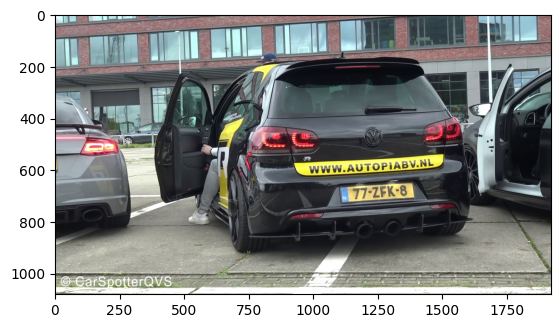

In [21]:
plt.imshow(image)

In [28]:
test_arr = image1.reshape(1,224,224,3)

In [29]:
cords = model.predict(test_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 35s 35s/step


In [32]:
denorm = np.array([w,w,h,h])
coords = cords * denorm
coords

array([[1102.91816711, 1426.52366638,  674.20589447,  724.30664062]])

In [34]:
coords = coords.astype(np.int32)
xmin ,xmax,ymin,ymax = coords[0]
pt1 = (xmin,ymin)
pt2 = (xmax,ymax)
print(pt1,pt2)

(1102, 674) (1426, 724)


In [44]:
def object_Detection(path):
    # -----------------Load Image
    image = load_img(path)
    image= np.array(image,dtype=np.uint8)
    image1 = load_img(path,target_size=(224,224))
    image1 = img_to_array(image1)
    image1 = image1 /255.0
    # --------------------
    h,w,d = image.shape
    test_arr = image1.reshape(1,224,224,3)
    cords = model.predict(test_arr)
    denorm = np.array([w,w,h,h])
    coords = cords * denorm
    coords = coords.astype(np.int32)
    xmin ,xmax,ymin,ymax = coords[0]
    pt1 = (xmin,ymin)
    pt2 = (xmax,ymax)
    image = cv2.rectangle(image,pt1,pt2,(0,255,0),2)
    return image

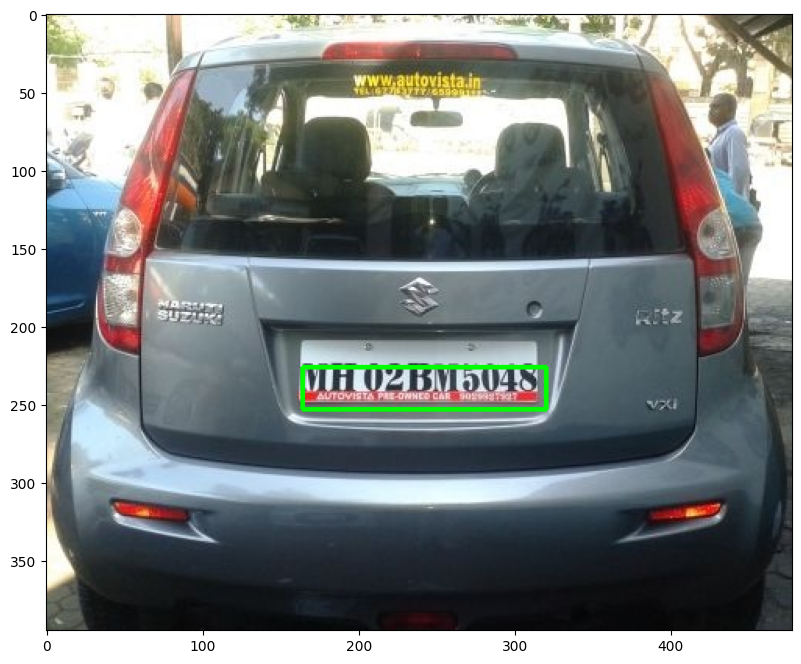

In [45]:
cv2.rectangle(image,pt1,pt2,(0,255,0),3)
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [3]:
def object_Detection(path):
    # -----------------Load Image
    image = load_img(path)
    image= np.array(image,dtype=np.uint8)
    image1 = load_img(path,target_size=(224,224))
    image1 = img_to_array(image1)
    image1 = image1 /255.0
    # --------------------
    h,w,d = image.shape
    test_arr = image1.reshape(1,224,224,3)
    cords = model.predict(test_arr)
    denorm = np.array([w,w,h,h])
    coords = cords * denorm
    coords = coords.astype(np.int32)
    return image,coords


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


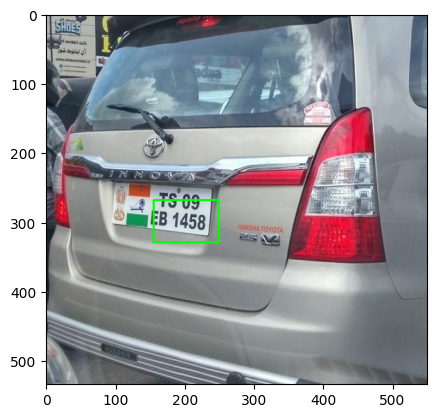

In [9]:
import pytesseract as pt
path = './images/N109.jpeg'
image,cords = object_Detection(path)
xmin ,xmax,ymin,ymax = cords[0]
pt1 = (xmin,ymin)
pt2 = (xmax,ymax)
image = cv2.rectangle(image,pt1,pt2,(0,255,0),2)
plt.imshow(image)

In [10]:
xmin ,xmax,ymin,ymax = cords[0]
img = np.array(load_img(path))
roi = img[ymin:ymax,xmin:xmax]

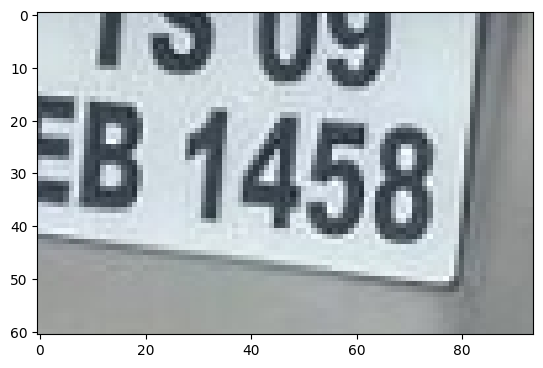

In [11]:
plt.imshow(roi)

In [12]:
pt.image_to_string(roi)

'IDUU\n1458 .\n\n'